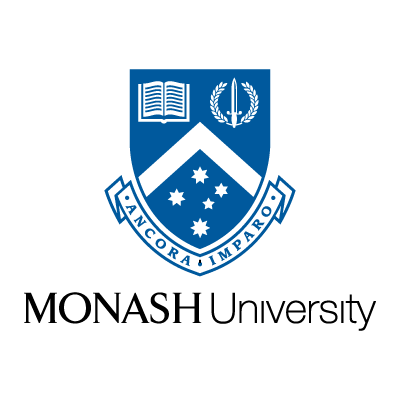

# FIT5196 Task 1 in Assessment 2
#### Student Name: Nisheeth Shah
#### Student ID: 29599644

Date: 02/10/2018

Environment: Python 3.x and Jupyter notebook

The main libraries used in the assignment are:
* pandas (to perform operations on the dataframe) 
* matplotlib (for plotting graphs)
* sklearn (for linear regression) 

## Data Cleansing

### Importing required libraries

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from scipy.stats import ttest_ind, ttest_ind_from_stats
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from random import randint
import impyute
import statsmodels.api as sm
import pylab

KeyboardInterrupt: 

### Reading csv data file into pandas dataframe and having initial glance at the data

In [2]:
df = pd.read_csv("29599644.csv") 

Read the first 10 lines of the data to have initial understanding of what the data is

In [6]:
df.head(10)

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare
0,ID1407767162,1.0,0.0,5.652,28.0,35.0,-36.675098,147.614225,-38.712987,146.159349,260.537,2018-03-25,08:59:20,251.52,13:10:51,99.62
1,ID1986741281,1.0,0.0,42.025,35.0,41.0,-38.665431,146.202615,-37.859710,147.666017,156.216,2018-03-19,00:17:49,153.72,2:51:32,118.53
2,ID1441360767,1.0,0.0,19.791,17.0,14.0,-37.669235,145.376985,-36.590333,146.799253,174.228,2018-01-07,05:19:42,170.60,8:10:17,122.46
3,ID1317083068,2.0,0.0,30.081,20.0,34.0,-37.330879,147.861076,-38.999889,147.033935,199.392,2018-02-17,12:28:01,183.21,15:31:13,142.82
4,ID1518375527,2.0,0.0,36.774,19.0,3.0,-38.160777,146.525992,-38.341371,146.071694,44.512,2018-04-20,22:53:10,46.55,23:39:42,148.56
5,ID1241165476,1.0,0.0,34.487,9.0,25.0,-37.021384,146.308215,-38.418917,143.043409,326.839,2018-04-23,16:20:12,313.68,21:33:52,112.89
6,ID1144862895,1.0,0.0,13.313,12.0,36.0,-37.361811,143.271771,-38.661605,143.500321,146.071,2018-06-28,20:59:05,144.21,23:23:17,99.87
7,ID1378562504,1.0,0.0,15.087,29.0,12.0,-38.931577,145.817021,-37.329664,143.517720,268.930,2018-04-07,07:43:09,259.39,12:02:32,92.64
8,ID5476416063,2.0,1.0,43.276,28.0,17.0,-36.687470,147.398612,-37.654619,145.659249,188.128,2018-06-16,09:47:06,173.27,12:40:22,159.81
9,ID5485087813,1.0,1.0,25.897,42.0,45.0,-37.721776,146.650155,-37.042134,142.939344,336.814,2018-03-07,16:04:00,323.03,21:27:01,153.79


Now lets have a look at the columns in the data and what are their datatype

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38064 entries, 0 to 38063
Data columns (total 16 columns):
Id                       38043 non-null object
Drone Type               38054 non-null float64
Post Type                38044 non-null float64
Package Weight           38064 non-null float64
Origin Region            38054 non-null float64
Destination Region       38054 non-null float64
Origin Latitude          38064 non-null float64
Origin Longitude         38064 non-null float64
Destination Latitude     38064 non-null float64
Destination Longitude    38064 non-null float64
Journey Distance         38064 non-null float64
Departure Date           38064 non-null object
Departure Time           38064 non-null object
Travel Time              38024 non-null float64
Delivery Time            38064 non-null object
Delivery Fare            38035 non-null float64
dtypes: float64(12), object(4)
memory usage: 4.6+ MB


There might be some null values in the data, lets quickly find out which variable carry how many nulls

In [8]:
# Count sum of missing values in each column
df.isnull().sum()

Id                       21
Drone Type               10
Post Type                20
Package Weight            0
Origin Region            10
Destination Region       10
Origin Latitude           0
Origin Longitude          0
Destination Latitude      0
Destination Longitude     0
Journey Distance          0
Departure Date            0
Departure Time            0
Travel Time              40
Delivery Time             0
Delivery Fare            29
dtype: int64

### There are few nulls in the data. We need to remove/impute them

Initially, we'll focus on
1. ID: These are supposed to uniquely present for all the rows. If missing, then we'll generate and insert IDs. I believe values of IDs are not used for calculation but just for refencing a row. Therefore, we'll generate unique IDs where missing.

2. Drone Type: The type of drone affect the further data. Therefore unless we don't know perfect formula to figure out the drone type from rest of the data, I believe, we remove the rows with missing values from data. Moreover, only 10 are missing so it would not make much difference in the overall data.

3. Post Type: The type of post affect the further data. Therefore unless we don't know perfect formula to figure out the post type from rest of the data, I believe, we remove the rows with missing values from data. Moreover, only 20 are missing so it would not make much difference in the overall data.

In [9]:
# Delete rows with nulls in Id, Drone Type, Post Type
df = df.dropna(subset=['Id', 'Drone Type', 'Post Type'])

# Drop duplicates IDs
df.drop_duplicates(subset=['Id'], keep=False)

df.head()

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare
0,ID1407767162,1.0,0.0,5.652,28.0,35.0,-36.675098,147.614225,-38.712987,146.159349,260.537,2018-03-25,08:59:20,251.52,13:10:51,99.62
1,ID1986741281,1.0,0.0,42.025,35.0,41.0,-38.665431,146.202615,-37.859710,147.666017,156.216,2018-03-19,00:17:49,153.72,2:51:32,118.53
2,ID1441360767,1.0,0.0,19.791,17.0,14.0,-37.669235,145.376985,-36.590333,146.799253,174.228,2018-01-07,05:19:42,170.60,8:10:17,122.46
3,ID1317083068,2.0,0.0,30.081,20.0,34.0,-37.330879,147.861076,-38.999889,147.033935,199.392,2018-02-17,12:28:01,183.21,15:31:13,142.82
4,ID1518375527,2.0,0.0,36.774,19.0,3.0,-38.160777,146.525992,-38.341371,146.071694,44.512,2018-04-20,22:53:10,46.55,23:39:42,148.56


We reset the index of the dataframe for easy reference. The indexes are not in series because we deleted few rows

In [10]:
df = df.reset_index(drop=True) # Drop the index column from the dataframe

There are few NaN in "Origin Region" and "Destination Region".
However, we have their data for its corresponding latitude and logitude from other rows with same latitude and logitude.
We believe that a two same region cannot have different coordinates(latitude and logitude) and vice versa. And so is the situation in the data.

Few same coordinates have region for some rows and missing for rest. We'll impute missing ones with present ones.

In [11]:
# First create a dummy dictionary and copy latitude:region into it for both origin and destination
dict1 = dict()
dict2 = dict()

# We'll use below two dictionaries further
origin_dict = dict()
dest_dict = dict()

# Find the latitude for both origin and destination region. And store retrieved latitude:region in dictionary
for index, row in df.iterrows():
    if not np.isnan(df.loc[df.index[index], 'Origin Region']):
        reg = df.loc[df.index[index], 'Origin Region']
        loc = df.loc[df.index[index], 'Origin Latitude']    
        dict1[loc] = reg
    
    if not np.isnan(df.loc[df.index[index], 'Destination Region']):
        reg = df.loc[df.index[index], 'Destination Region']
        loc = df.loc[df.index[index], 'Destination Latitude']
        dict2[loc] = reg

# Copy the dictionary data to another dictionary except NaNs
origin_dict = dict(x for x in dict1.items() if all(x))
dest_dict = dict(x for x in dict2.items() if all(x))

So now we have a dictionary for latitude with its corresponding region.
We'll find latitude from df where region is missing and impute it with data from dictionary.

This technique is applied on both origin and destination simultaneously.

Please note that the below block throw an error if once imputation is done and we're again trying to impute it. There will be no error tbough on first time imputation. If you want try code again, start from beginning.

In [12]:
# For loop will find latitude where region is missing and impute using region from dictionary
for index, row in df.iterrows():
    if np.isnan(df.loc[df.index[index], 'Origin Region']):
        df.loc[df.index[index], 'Origin Region'] = origin_dict[df.loc[df.index[index], 'Origin Latitude']]
    
    if np.isnan(df.loc[df.index[index], 'Destination Region']):
        if (df.loc[df.index[index], 'Destination Latitude']) in dest_dict:
            df.loc[df.index[index], 'Destination Region'] = dest_dict[df.loc[df.index[index], 'Destination Latitude']]
#         else:
#             df.drop(index, inplace=True)
        

# If there is still any data where we don't know the region because its latitude is unique in df, then we delete that row.
# In our case, there is only one such row. So therefore, it doesn't make much difference in our study
df = df[pd.notnull(df['Destination Region'])]

So far, we've handled missing values in few columns. We will continue this ahead for further columns too. 

There is numerical data few of the further columns. So lets statisticaly check the data

In [13]:
# Quick statistical overview of data
df.describe()

,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Travel Time,Delivery Fare
count,38012.000000,38012.000000,38012.000000,38012.000000,38012.000000,38012.000000,38012.000000,38012.000000,38012.000000,38012.000000,37972.000000,37983.000000
mean,1.701936,0.299958,28.706736,23.001684,22.988635,-37.770707,145.375496,-37.775432,145.369600,216.461196,202.585592,151.706761
std,0.780018,0.458245,13.837456,13.005547,13.055024,1.895143,6.894831,1.901898,6.886140,113.486918,102.769805,65.159242
min,1.000000,0.000000,5.000000,1.000000,1.000000,-39.006749,-148.316221,-39.006749,-147.226104,0.343000,7.610000,63.570000
25%,1.000000,0.000000,16.799000,12.000000,12.000000,-38.503663,143.995736,-38.507455,143.974322,129.133750,123.560000,118.540000
50%,2.000000,0.000000,28.547500,23.000000,23.000000,-37.782963,145.504949,-37.797137,145.497746,203.834000,190.785000,144.970000
75%,2.000000,1.000000,40.470250,34.000000,34.000000,-37.156218,147.037066,-37.162114,147.041681,290.539750,269.690000,173.745000
max,3.000000,1.000000,61.989000,45.000000,45.000000,38.990314,148.450977,38.945308,148.450977,553.612000,526.280000,1314.720000


#### There are symantic anamolies in data

In above decription table, the mean for 'Origin Latitude' is around -37 but we have maximum value 38.xxxxxx. Similarly, for destination latitude column.

I believe that there is an error with negative symbol ("-") in few rows. That is, "-" is missing in certain rows where it should be whereas, its present where it shouldn't be. We'll update the data

In [14]:
# Update values. As per above table, few values are negative where they are supposed to positive and vice-versa.
df.loc[df['Origin Latitude'] > 0, 'Origin Latitude'] *= -1
df.loc[df['Origin Longitude'] < 0, 'Origin Longitude'] *= -1

df.loc[df['Destination Latitude'] > 0, 'Destination Latitude'] *= -1
df.loc[df['Destination Longitude'] < 0, 'Destination Longitude'] *= -1

#### There are sytactical anamolies too in data

While going through the provided Excel data, I found inconsistency in date format in column "Departure date". Lets see all the unique dates in that column:

In [15]:
df['Departure Date'].unique()

array(['2018-03-25', '2018-03-19', '2018-01-07', '2018-02-17',
       '2018-04-20', '2018-04-23', '2018-06-28', '2018-04-07',
       '2018-06-16', '2018-03-07', '2018-05-10', '2018-02-09',
       '2018-07-16', '2018-06-09', '2018-07-04', '2018-03-10',
       '2018-05-22', '2018-05-20', '2018-01-26', '2018-06-07',
       '2018-06-20', '2018-05-23', '2018-05-04', '2018-05-28',
       '2018-06-27', '2018-01-23', '2018-05-26', '2018-02-03',
       '2018-07-03', '2018-04-05', '2018-05-08', '2018-04-28',
       '2018-03-16', '2018-05-15', '2018-01-20', '2018-03-28',
       '2018-02-22', '2018-04-17', '2018-02-27', '2018-07-11',
       '2018-07-23', '2018-05-02', '2018-02-16', '2018-04-26',
       '2018-01-08', '2018-07-09', '2018-01-02', '2018-04-04',
       '2018-07-17', '2018-06-14', '2018-02-19', '2018-07-27',
       '2018-01-18', '2018-07-05', '2018-05-12', '2018-03-27',
       '2018-02-10', '2018-01-21', '2018-02-01', '2018-06-15',
       '2018-07-18', '2018-05-17', '2018-06-01', '2018-

Head of the data has date in format yyyy-mm-dd, whereas the tail of the data has date in yyyy-dd-mm format.

We'll update the tail data as per head data format i.e. yyyy-mm-dd. We're just simply using the format that is used maximum than other.

In [16]:
# First lets pull the Departure Date column data into a list so that further operations become easy
departure_date_list = df["Departure Date"].tolist()

# We loop through each list element and split the full-date into year, month and date. 
# If the month value is more than 12, then we swap month with date
for index, item in enumerate(departure_date_list):
    dater = item.split("-")
    check_date = int(dater[1])
    
#     Check if month > 12, then we swap month and date. Eg.: 2018-13-11 will become 2018-11-13
    if check_date>12:
        dater[1], dater[2] = dater[2], dater[1]
        departure_date_list[index] = dater[0] + "-" + dater[1] + "-" + dater[2]

Replace the updated list over Departure Date column in dataframe and notice the change

In [17]:
df["Departure Date"] = departure_date_list
df['Departure Date'].unique()

array(['2018-03-25', '2018-03-19', '2018-01-07', '2018-02-17',
       '2018-04-20', '2018-04-23', '2018-06-28', '2018-04-07',
       '2018-06-16', '2018-03-07', '2018-05-10', '2018-02-09',
       '2018-07-16', '2018-06-09', '2018-07-04', '2018-03-10',
       '2018-05-22', '2018-05-20', '2018-01-26', '2018-06-07',
       '2018-06-20', '2018-05-23', '2018-05-04', '2018-05-28',
       '2018-06-27', '2018-01-23', '2018-05-26', '2018-02-03',
       '2018-07-03', '2018-04-05', '2018-05-08', '2018-04-28',
       '2018-03-16', '2018-05-15', '2018-01-20', '2018-03-28',
       '2018-02-22', '2018-04-17', '2018-02-27', '2018-07-11',
       '2018-07-23', '2018-05-02', '2018-02-16', '2018-04-26',
       '2018-01-08', '2018-07-09', '2018-01-02', '2018-04-04',
       '2018-07-17', '2018-06-14', '2018-02-19', '2018-07-27',
       '2018-01-18', '2018-07-05', '2018-05-12', '2018-03-27',
       '2018-02-10', '2018-01-21', '2018-02-01', '2018-06-15',
       '2018-07-18', '2018-05-17', '2018-06-01', '2018-

### Verifying/imputing "Travel Time" column

We'll verify the data in column "Travel Time" by using the formula:

Travel Time = 10 + ('Journey Distance' - mean('Journey Distance' / 'Travel Time') / 12) / 'speed'

We calculate as:

speed = 'Journey Distance' / 'Travel Time'


The steps processed to verify and impute "Travel Time" is:
1. First, find speed for each observation
2. Find mean of all speed data
3. Check if the speed of each observation is within the range of that mean+1 or mean-1
4. If not within the range, then replace the speed by the mean value
3. Now, calculate travel time by above mentioned formula
4. We use the new travel time values as final


The reason of using the new travel time value is because it verfies the data and include 5 mins each for take-off and landing.

Let create a another copy df and create a speed column first.

The data in speed column is calculated considering drone type. That is, each drone type will have different mean of speed.

In [18]:
# Create a copy df
temp_df = df.copy()

# Calculate speed
temp_df['speed'] = temp_df['Journey Distance'] / temp_df['Travel Time']

# Different means as per drone type
type1 = temp_df['Drone Type'] == 1
drone_type1_mean = temp_df.loc[type1, 'speed'].mean()

type2 = temp_df['Drone Type'] == 2
drone_type2_mean = temp_df.loc[type2, 'speed'].mean()

type3 = temp_df['Drone Type'] == 3
drone_type3_mean = temp_df.loc[type3, 'speed'].mean()


# Display the means
print(drone_type1_mean)
print(drone_type2_mean)
print(drone_type3_mean)

1.010250711101323
1.0704675629543945
1.1139951995243156


Check if the speed of each observation is within the range of that mean+1 or mean-1
If not within the range, then replace the speed by the mean value

In [19]:
temp_df.loc[(temp_df['Drone Type'] == 1) & 
            ~((temp_df['speed'] <= (drone_type1_mean+1)) & (temp_df['speed'] >= (drone_type1_mean-1))), 
              ['speed']] = drone_type1_mean

temp_df.loc[(temp_df['Drone Type'] == 2) & 
            ~((temp_df['speed'] <= (drone_type2_mean+1)) & (temp_df['speed'] >= (drone_type2_mean-1))), 
              ['speed']] = drone_type2_mean

temp_df.loc[(temp_df['Drone Type'] == 3) & 
            ~((temp_df['speed'] <= (drone_type3_mean+1)) & (temp_df['speed'] >= (drone_type3_mean-1))), 
              ['speed']] = drone_type3_mean

We drop the original travel time column because we'll calculate and use the new values

In [20]:
temp_df = temp_df.drop('Travel Time', 1)

Calculate new travel time and check for missing value

In [21]:
# Create new travel time column in df as float data type
temp_df['Travel Time'] = 0
temp_df['Travel Time'] = temp_df['Travel Time'].astype(np.float64)

# Calculate new travel time based on drone type
temp_df.loc[(temp_df['Drone Type'] == 1), ['Travel Time']] = 10 + (
    temp_df['Journey Distance'] - (drone_type1_mean/12)) / temp_df['speed']

temp_df.loc[(temp_df['Drone Type'] == 2), ['Travel Time']] = 10 + (
    temp_df['Journey Distance'] - (drone_type2_mean/12)) / temp_df['speed']

temp_df.loc[(temp_df['Drone Type'] == 3), ['Travel Time']] = 10 + (
    temp_df['Journey Distance'] - (drone_type3_mean/12)) / temp_df['speed']

# Check for missing values in travel time
temp_df.isnull().sum()

Id                        0
Drone Type                0
Post Type                 0
Package Weight            0
Origin Region             0
Destination Region        0
Origin Latitude           0
Origin Longitude          0
Destination Latitude      0
Destination Longitude     0
Journey Distance          0
Departure Date            0
Departure Time            0
Delivery Time             0
Delivery Fare            29
speed                     0
Travel Time               0
dtype: int64

We now do not need the speed column so drop it

In [22]:
temp_df = temp_df.drop('speed', 1)

Re arrange the df as per orignal format 

In [23]:
temp_df = temp_df[['Id',
         'Drone Type',
            'Post Type',
            'Package Weight',
            'Origin Region',
            'Destination Region',
            'Origin Latitude',
            'Origin Longitude',
            'Destination Latitude',
            'Destination Longitude',
            'Journey Distance',
         'Departure Date',
         'Departure Time',
            'Travel Time',
            'Delivery Time',
            'Delivery Fare']]

df = temp_df.copy()

df.isnull().sum()

Id                        0
Drone Type                0
Post Type                 0
Package Weight            0
Origin Region             0
Destination Region        0
Origin Latitude           0
Origin Longitude          0
Destination Latitude      0
Destination Longitude     0
Journey Distance          0
Departure Date            0
Departure Time            0
Travel Time               0
Delivery Time             0
Delivery Fare            29
dtype: int64

### Further imputation methods (linear regression, mean imputation, etc)

First, lets plot boxplot for each column and see the variation of data

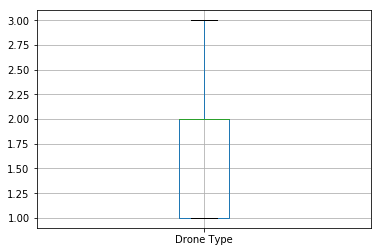

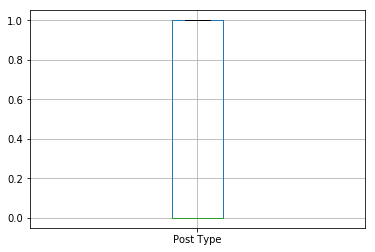

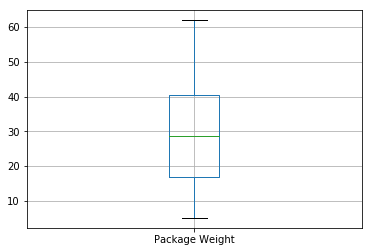

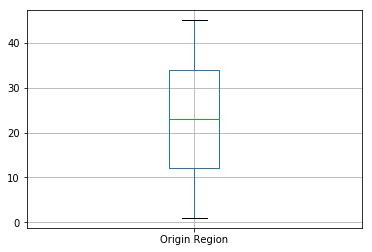

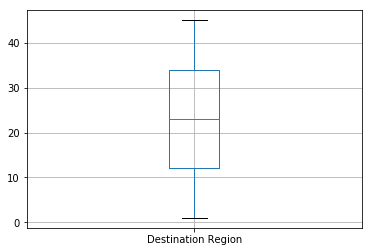

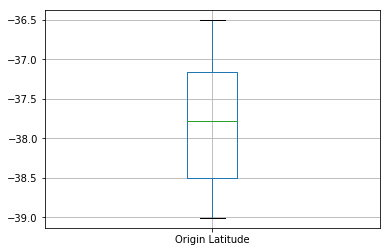

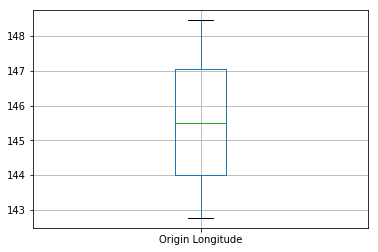

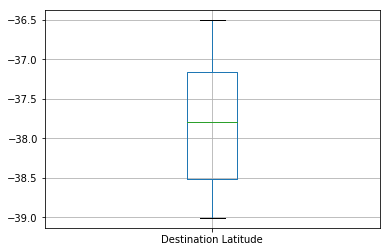

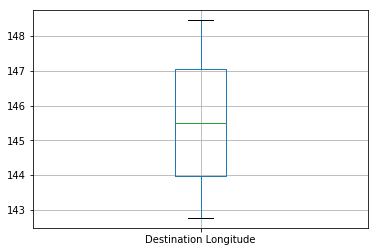

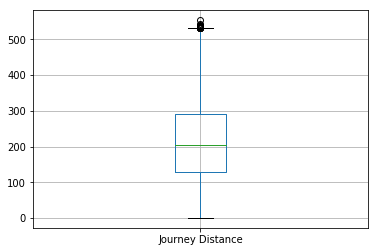

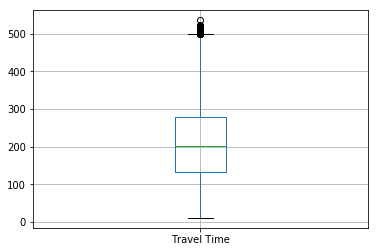

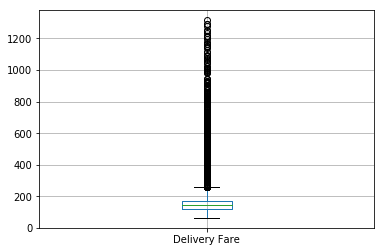

In [24]:
b_list = (['Drone Type',
            'Post Type',
            'Package Weight',
            'Origin Region',
            'Destination Region',
            'Origin Latitude',
            'Origin Longitude',
            'Destination Latitude',
            'Destination Longitude',
            'Journey Distance',
            'Travel Time',
            'Delivery Fare'])

for idx, val in enumerate(b_list):
    plt.figure()
    df.boxplot(column=[b_list[idx]])

Ah, there is something wrong with "Delivery Fare". Let particularly see this column again in detail

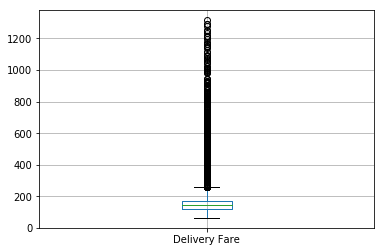

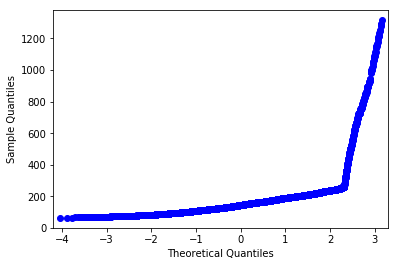

In [25]:
plt.figure()
df.boxplot(column=[b_list[idx]])

sm.qqplot(df['Delivery Fare'])
pylab.show()

We'll try to find the correlation between "Delivery fare" and other variable

In [26]:
# Correlation
corr = df.corr()
# plot the heatmap
corr.style.background_gradient()

,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Travel Time,Delivery Fare
Drone Type,1,0.00151054,0.00343907,-0.00246347,0.00614676,-0.000537804,0.0026111,0.00283842,0.00466279,0.000217978,-0.0775089,0.437297
Post Type,0.00151054,1,0.000148882,-0.000773378,-0.00288666,0.00318065,0.00410099,-0.00341916,0.00735688,0.00183482,0.00146548,0.27802
Package Weight,0.00343907,0.000148882,1,0.00183763,0.000594649,0.00208177,0.00646993,0.0030563,-0.00423957,0.00192042,0.00157868,0.179715
Origin Region,-0.00246347,-0.000773378,0.00183763,1,0.00176558,-0.0784734,-0.0100126,0.0032054,-0.00486348,0.133366,0.133309,0.0172151
Destination Region,0.00614676,-0.00288666,0.000594649,0.00176558,1,-0.0029728,0.00764918,-0.0693446,-0.0214617,0.122629,0.121652,0.025103
Origin Latitude,-0.000537804,0.00318065,0.00208177,-0.0784734,-0.0029728,1,-0.0703017,0.00553985,-0.00188433,0.0370869,0.0372347,0.0110346
Origin Longitude,0.0026111,0.00410099,0.00646993,-0.0100126,0.00764918,-0.0703017,1,-6.53681e-05,0.00994973,0.00114944,0.000977464,0.000334259
Destination Latitude,0.00283842,-0.00341916,0.0030563,0.0032054,-0.0693446,0.00553985,-6.53681e-05,1,-0.0626112,0.0471854,0.0469501,0.00628999
Destination Longitude,0.00466279,0.00735688,-0.00423957,-0.00486348,-0.0214617,-0.00188433,0.00994973,-0.0626112,1,-0.000339887,-0.000659009,0.0100603
Journey Distance,0.000217978,0.00183482,0.00192042,0.133366,0.122629,0.0370869,0.00114944,0.0471854,-0.000339887,1,0.996073,0.179212


We see that delivery fare has got correlation with few variables. We'll use these few variables create a model and predict missing data in delivery fare

In [27]:
# We build model for "Delivery Fare" and check with various predictors

# We select only the predictors which have good correlation with the target variable
delivery_fare_df = df[['Drone Type', 'Post Type', 'Package Weight', 'Origin Region', 'Destination Region', 'Journey Distance', 'Travel Time', 'Delivery Fare']].copy()

# Remove all the rows where null because it can cause incorrectness in the model
delivery_fare_df = delivery_fare_df.dropna(how='any',axis=0)

# Check number of rows and columns in df
# delivery_fare_df.info()

# Display the count of missing values
# delivery_fare_df.isnull().sum()

# Create new data without target variable
X = delivery_fare_df.drop(['Delivery Fare'], axis = 1)
# New data with target variable
Y = delivery_fare_df['Delivery Fare']

# Method to split X and Y into training and testing sets. 
# Testing data set will have 33% while training will have 66% of full data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=5)

# Print the shape of data and see structure of how much data is splitted
print("\nShapes:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("Y_train:", Y_train.shape)
print("Y_test:", Y_test.shape)

# Create linear regression object
lm = LinearRegression()

# Train the model using the training sets
lm.fit(X_train, Y_train)

# Predict for a new observation
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)

# MSE
print("\nFit a model X_train, and calculate MSE with Y_train:", np.mean(Y_train - pred_train) ** 2)
print("Fit a model X_train, and calculate MSE with X_test, Y_test:", np.mean(Y_test - pred_test) ** 2)

# R square:
print("\nR square:", lm.score(X,Y))

# Coefficients and intercept
print("\nCoefficients:", list(zip(X_train.columns, lm.coef_)))
print("Intercept:", lm.intercept_)


Shapes:
X_train: (25448, 7)
X_test: (12535, 7)
Y_train: (25448,)
Y_test: (12535,)

Fit a model X_train, and calculate MSE with Y_train: 6.095557177880598e-28
Fit a model X_train, and calculate MSE with X_test, Y_test: 0.06831240098849044

R square: 0.3316641196530854

Coefficients: [('Drone Type', 37.16055536102314), ('Post Type', 39.45554602868207), ('Package Weight', 0.8345863204695911), ('Origin Region', -0.020734950637213284), ('Destination Region', 0.017783066874821694), ('Journey Distance', 0.03069093891258945), ('Travel Time', 0.0782585030035392)]
Intercept: 29.37111098811981


Let plot the new predicted data against the true value. This way we'll be able to figure out how well our model is made

<function matplotlib.pyplot.show>

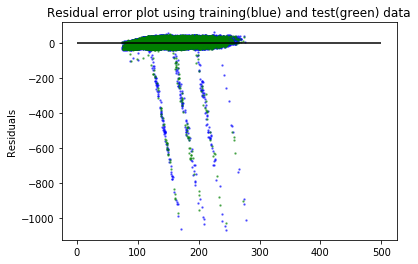

In [28]:
plt.scatter(pred_train, pred_train - Y_train, c='b', s=2, alpha=0.5)
plt.scatter(pred_test, pred_test - Y_test, c='g', s=2, alpha=0.5)
plt.hlines(y=0, xmin=0, xmax=500)
plt.title("Residual error plot using training(blue) and test(green) data")
plt.ylabel("Residuals")
plt.show

# The scatter plot looks like rainfall.
# Jokes apart, we can see the some residual error from the plot

In the above model summary, we see that R-square value is 0.33. We'll try to maximise it nearer to 1

So we'll try to make another model to maximise R sqare and minimise MSE

In [29]:
delivery_fare_df = df[['Drone Type', 'Post Type', 'Package Weight', 'Journey Distance', 'Travel Time', 'Delivery Fare']].copy()

# Remove all the rows where null because it can cause incorrectness in the model
delivery_fare_df = delivery_fare_df.dropna(how='any',axis=0)

# Drop the target variable
X = delivery_fare_df.drop(['Delivery Fare'], axis = 1)
Y = delivery_fare_df['Delivery Fare']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=5)

print("\nShapes:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("Y_train:", Y_train.shape)
print("Y_test:", Y_test.shape)

lm = LinearRegression()
lm.fit(X_train, Y_train)

pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)

# MSE
print("\nFit a model X_train, and calculate MSE with Y_train:", np.mean(Y_train - pred_train) ** 2)
print("Fit a model X_train, and calculate MSE with X_test, Y_test:", np.mean(Y_test - pred_test) ** 2)

# R square:
print("\nR square:", lm.score(X,Y))

# Coefficients and intercept
print("\nCoefficients:", list(zip(X_train.columns, lm.coef_)))
print("Intercept:", lm.intercept_)


Shapes:
X_train: (25448, 5)
X_test: (12535, 5)
Y_train: (25448,)
Y_test: (12535,)

Fit a model X_train, and calculate MSE with Y_train: 1.4133301075959944e-28
Fit a model X_train, and calculate MSE with X_test, Y_test: 0.0717950567190635

R square: 0.33163784907780613

Coefficients: [('Drone Type', 37.15942321469522), ('Post Type', 39.45274577355219), ('Package Weight', 0.8344388714912814), ('Journey Distance', 0.030763789793376572), ('Travel Time', 0.07811107795185279)]
Intercept: 29.323432843120614


Here r square value is increased and MSE reduced. THis means this model is better than the earlier one

<function matplotlib.pyplot.show>

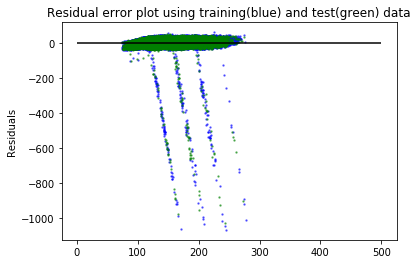

In [30]:
plt.scatter(pred_train, pred_train - Y_train, c='b', s=2, alpha=0.5)
plt.scatter(pred_test, pred_test - Y_test, c='g', s=2, alpha=0.5)
plt.hlines(y=0, xmin=0, xmax=500)
plt.title("Residual error plot using training(blue) and test(green) data")
plt.ylabel("Residuals")
plt.show

# We can see the some residual error from the plot. But these are lesser than the previous scatter(rainfall-like) plot

In [35]:
df.to_csv("29599644_solution.csv", encoding='utf-8', index=False)

## Summary
This assignment is about understanding data and handling missing values.

Various techniques are used to handle missing values based upon the type of column data and its relationship with other columns

Moreover, EDDA methods are also applied